# Neopythen: potential map bases on Ellenberg(1)




(1) https://www.researchgate.net/publication/235710596_Zeigwerte_von_Pflanzen_in_MittelEuropa

Check ellenberg numbers:

In [7]:
# READ ELLENBERG LEGEND
import pandas as pd
ellenberg_csv = r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\neophytes_ellenberg.csv'
df = pd.read_csv(ellenberg_csv,encoding="ISO-8859-1")
print(df.to_string()) 



                              zahl   code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          info ziffer code_ziff                                                                                                                                                                 ziffer_info
0                        Lichtzahl      L                                                                                          

Constrution of datacube with 10m raster files which can be used to calculate the Ellenbergnumbers:




## (1) Reading dims

In [1]:
# Reading libaries:

import os
from pathlib import Path, WindowsPath
from glob import glob
from pathlib import Path
import geopandas as gpd

from pathlib import Path
import geopandas as gpd
import sys
import matplotlib.pyplot as plt

import rasterio
import rasterio.mask
import numpy as np
import subprocess
import pandas as pd
import xarray as xr
import rioxarray as rxr


print("job done")

job done


## (2) Building cube

In [3]:
## reading raster from CWS:




##  base folder on CWS:
base_path = WindowsPath('N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f02_raster_10m_collection/ellenberg')


## AOI
#--------------------------
#min_x = 3316000 
#max_x = 3345000

#max_y = 1780000
#min_y = 1799000 
#--------------------------

## Datasets 01 ADMIN:-------------------------------------------
d01_light_raster = os.path.join(base_path, 'shadow_2019_10m_b1.tif')
print(d01_light_raster)
# Open the file:
cube_01 = rxr.open_rasterio(d01_light_raster)
cube_01 = cube_01.to_dataset(name='d01_light_number')
cube_01


### Dataset 02 Corine Land Cover 2000-2018:-------------------------------------------
##2000
#d02_clc2000 = os.path.join(base_path, 'd02_landuse_landcover/clc_single_acc_raster/CLC2000ACC_V2018_20.tif')
#print(d02_clc2000)
#cube_02 = rxr.open_rasterio(d02_clc2000)
#cube_02 = cube_02.to_dataset(name='d02_clc2000')
#cube_02 = cube_02.sel(y=slice(min_y,max_y), x=slice(min_x,max_x))
#2006

N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\shadow_2019_10m_b1.tif


<xarray.Dataset>
Dimensions:           (band: 1, x: 972, y: 1044)
Coordinates:
  * band              (band) int32 1
  * x                 (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
  * y                 (y) float64 8.002e+04 8.002e+04 ... 6.96e+04 6.96e+04
    spatial_ref       int32 0
Data variables:
    d01_light_number  (band, y, x) float32 ...

### (2.1) testing cubes

<xarray.Dataset>
Dimensions:           (band: 1, x: 972, y: 1044)
Coordinates:
  * band              (band) int32 1
  * x                 (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
  * y                 (y) float64 8.002e+04 8.002e+04 ... 6.96e+04 6.96e+04
    spatial_ref       int32 0
Data variables:
    d01_light_number  (band, y, x) float32 ...

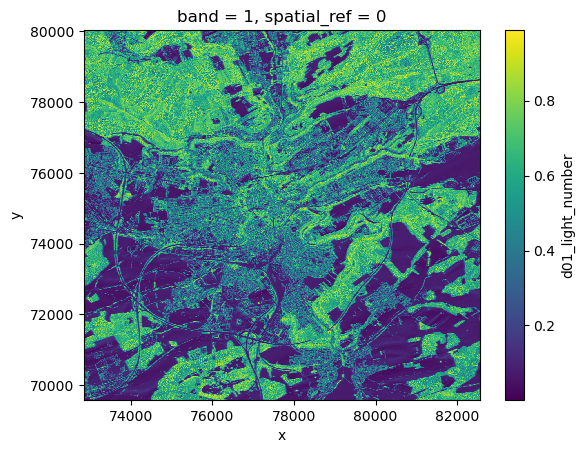

In [5]:
combined_array = cube_01

combined_array.d01_light_number.sel(band=1).plot()
#combined_array.d07_population_2021_1km.sel(band=1).plot()
combined_array
